### 데이터 전처리

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv", encoding = 'latin-1')
print('dataset shape: ', cust_df.shape)
cust_df.head()

dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [10]:
# 데이터 사이즈가 너무 커서 null값이 안나타난다.
# 전부 다 숫자형으로 이루어짐을 알 수 있다.
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [12]:
# Series로 만들어서 value_counts를 사용한다.
# 만족 : 0, 불만족 : 1
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0: .2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은  0.04


In [13]:
# var3의 값이 -999999로 null값임을 의심할 수 있다.
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [14]:
# -999999는 너무 차이가 나기에 가장 많은 값인 2로 대체해준다.
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [15]:
# var3 피처값 대체 및 ID 피처 드롭
# ID는 필요없는 값으로 드롭해준다.
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

# 피처 세트와 레이블 세트 분리하기, 레이블 컬럼은 DataFrame의 맨 마지막의 위치해 컬럼 위치를 -1로 분리하기
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape: {0}'.format(X_features.shape))


피처 데이터 shape: (76020, 369)


In [17]:
from sklearn.model_selection import train_test_split

# train_test_split()안에 stratify = y_labels를 입력하면, y_labels와 비율과 비슷하게 features가 나눠진다.
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape: {0}, 테스트 세트 Shape: {1}'.format(X_train.shape, X_test.shape))

# 학습 데이터와 테스트 데이터의 레이블 값 분포 비율이 비슷해야지 잘 나누어진거라고 볼 수 있다.
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)


학습 세트 Shape: (60816, 369), 테스트 세트 Shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로 random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

# 평가를 roc_auc니깐 성능 평가 지표를 auc로, 조기 중간 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100,
           eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0: .4f}'.format(xgb_roc_score))
                                            

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [22]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100dmfh rkath
xgb_clf = XGBClassifier(n_estimators = 100)

# 'colample_bytree' : 트리를 적게 만들기 위해서 사용한다.
params = {'max_depth' : [5,7], 'min_child_weigt' : [1,3], 'colample_bytree' : [0.5, 0.75]}

# 하이퍼 파라미터 테스트와 수행속도를 향상 시키기 위해 cv를 지정하지 않음.
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc',
          eval_set = [(X_train, y_train), (X_test, y_test)])

print('GriedSearchCV 최적 파라미터 :', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC: {0: .4f}'.format(xgb_roc_score))

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80981	validation_1-auc:0.81140
[1]	validation_0-auc:0.82482	validation_1-auc:0.81883
[2]	validation_0-auc:0.82846	validation_1-auc:0.82287
[3]	validation_0-auc:0.83174	validation_1-auc:0.82258
[4]	validation_0-auc:0.83574	validation_1-auc:0.82679
[5]	validation_0-auc:0.83952	validation_1-auc:0.82895
[6]	validation_0-auc:0.84310	validation_1-auc:0.83338
[7]	validation_0-auc:0.84494	validation_1-auc:0.83317
[8]	validation_0-auc:0.84869	validation_1-auc:0.83436
[9]	validation_0-auc:0.85083	validation_1-auc:0.83724
[10]	validation_0-auc:0.85320	validation_1-auc:0.83852
[11]	validation_0-auc:0.85498	validation_1-auc:0.8392

[33]	validation_0-auc:0.87898	validation_1-auc:0.83790
[34]	validation_0-auc:0.87923	validation_1-auc:0.83802
[35]	validation_0-auc:0.87953	validation_1-auc:0.83788
[36]	validation_0-auc:0.87970	validation_1-auc:0.83809
[37]	validation_0-auc:0.88109	validation_1-auc:0.83760
[38]	validation_0-auc:0.88138	validation_1-auc:0.83792
[39]	validation_0-auc:0.88203	validation_1-auc:0.83817
[40]	validation_0-auc:0.88252	validation_1-auc:0.83822
[41]	validation_0-auc:0.88338	validation_1-auc:0.83858
[42]	validation_0-auc:0.88354	validation_1-auc:0.83844
[43]	validation_0-auc:0.88452	validation_1-auc:0.83824
[44]	validation_0-auc:0.88509	validation_1-auc:0.83838
[45]	validation_0-auc:0.88513	validation_1-auc:0.83856
[46]	validation_0-auc:0.88565	validation_1-auc:0.83842
[17:54:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost cor

[15]	validation_0-auc:0.86322	validation_1-auc:0.83792
[16]	validation_0-auc:0.86392	validation_1-auc:0.83780
[17]	validation_0-auc:0.86503	validation_1-auc:0.83711
[18]	validation_0-auc:0.86683	validation_1-auc:0.83654
[19]	validation_0-auc:0.86767	validation_1-auc:0.83676
[20]	validation_0-auc:0.86858	validation_1-auc:0.83636
[21]	validation_0-auc:0.87017	validation_1-auc:0.83650
[22]	validation_0-auc:0.87073	validation_1-auc:0.83704
[23]	validation_0-auc:0.87161	validation_1-auc:0.83704
[24]	validation_0-auc:0.87210	validation_1-auc:0.83632
[25]	validation_0-auc:0.87277	validation_1-auc:0.83619
[26]	validation_0-auc:0.87357	validation_1-auc:0.83532
[27]	validation_0-auc:0.87394	validation_1-auc:0.83543
[28]	validation_0-auc:0.87444	validation_1-auc:0.83537
[29]	validation_0-auc:0.87543	validation_1-auc:0.83577
[30]	validation_0-auc:0.87666	validation_1-auc:0.83536
[31]	validation_0-auc:0.87703	validation_1-auc:0.83526
[32]	validation_0-auc:0.87814	validation_1-auc:0.83529
[33]	valid

[1]	validation_0-auc:0.82332	validation_1-auc:0.82161
[2]	validation_0-auc:0.82943	validation_1-auc:0.82690
[3]	validation_0-auc:0.83202	validation_1-auc:0.82430
[4]	validation_0-auc:0.83388	validation_1-auc:0.82573
[5]	validation_0-auc:0.84130	validation_1-auc:0.83163
[6]	validation_0-auc:0.84521	validation_1-auc:0.83513
[7]	validation_0-auc:0.84798	validation_1-auc:0.83615
[8]	validation_0-auc:0.84876	validation_1-auc:0.83650
[9]	validation_0-auc:0.85104	validation_1-auc:0.83781
[10]	validation_0-auc:0.85300	validation_1-auc:0.83868
[11]	validation_0-auc:0.85486	validation_1-auc:0.83936
[12]	validation_0-auc:0.85688	validation_1-auc:0.84003
[13]	validation_0-auc:0.85765	validation_1-auc:0.84025
[14]	validation_0-auc:0.85902	validation_1-auc:0.84054
[15]	validation_0-auc:0.86056	validation_1-auc:0.84099
[16]	validation_0-auc:0.86172	validation_1-auc:0.84172
[17]	validation_0-auc:0.86341	validation_1-auc:0.84222
[18]	validation_0-auc:0.86546	validation_1-auc:0.84234
[19]	validation_0-a

[37]	validation_0-auc:0.90951	validation_1-auc:0.83215
[38]	validation_0-auc:0.90963	validation_1-auc:0.83206
[39]	validation_0-auc:0.90978	validation_1-auc:0.83222
[40]	validation_0-auc:0.90999	validation_1-auc:0.83185
[17:55:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81968	validation_1-auc:0.81490
[1]	validation_0-auc:0.83145	validation_1-auc:0.82207
[2]	validation_0-auc:0.83812	validation_1-auc:0.82338
[3]	validation_0-auc:0.84498	validation_1-auc:0.83001
[4]	validation_0-auc:0.85001	validation_1-auc:0.83156
[5]	validation_0-auc:0.85339	validation_1-auc:0.83381
[6]	validation_0-auc:0.86025	validation_1-auc:0.83713
[7]	validation_0-auc:0.86526	validation_1-auc:0.83

[39]	validation_0-auc:0.90169	validation_1-auc:0.83744
[40]	validation_0-auc:0.90197	validation_1-auc:0.83712
[41]	validation_0-auc:0.90232	validation_1-auc:0.83661
[42]	validation_0-auc:0.90262	validation_1-auc:0.83703
[43]	validation_0-auc:0.90381	validation_1-auc:0.83623
[17:55:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82472	validation_1-auc:0.81715
[1]	validation_0-auc:0.83604	validation_1-auc:0.82393
[2]	validation_0-auc:0.84282	validation_1-auc:0.82645
[3]	validation_0-auc:0.84709	validation_1-auc:0.82988
[4]	validation_0-auc:0.85226	validation_1-auc:0.83343
[5]	validation_0-auc:0.85748	validation_1-auc:0.83423
[6]	validation_0-auc:0.86179	validation_1-auc:0.8

[43]	validation_0-auc:0.90954	validation_1-auc:0.83874
[44]	validation_0-auc:0.90980	validation_1-auc:0.83865
[45]	validation_0-auc:0.90985	validation_1-auc:0.83812
[17:55:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82461	validation_1-auc:0.81524
[1]	validation_0-auc:0.83170	validation_1-auc:0.81901
[2]	validation_0-auc:0.83997	validation_1-auc:0.82453
[3]	validation_0-auc:0.84724	validation_1-auc:0.83091
[4]	validation_0-auc:0.85046	validation_1-auc:0.83181
[5]	validation_0-auc:0.85900	validation_1-auc:0.83494
[6]	validation_0-auc:0.86180	validation_1-auc:0.83611
[7]	validation_0-auc:0.86455	validation_1-auc:0.83723
[8]	validation_0-auc:0.86830	validation_1-auc:0.837

[42]	validation_0-auc:0.91243	validation_1-auc:0.83402
[17:55:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80981	validation_1-auc:0.81140
[1]	validation_0-auc:0.82482	validation_1-auc:0.81883
[2]	validation_0-auc:0.82846	validation_1-auc:0.82287
[3]	validation_0-auc:0.83174	validation_1-auc:0.82258
[4]	validation_0-auc:0.83574	validation_1-auc:0.82679
[5]	validation_0-auc:0.83952	validation_1-auc:0.82895
[6]	validation_0-auc:0.84310	validation_1-auc:0.83338
[7]	validation_0-auc:0.84494	validation_1-auc:0.83317
[8]	validation_0-auc:0.84869	validation_1-auc:0.83436
[9]	validation_0-auc:0.85083	validation_1-auc:0.83724
[10]	validation_0-auc:0.85320	validation_1-auc:0.8385

[31]	validation_0-auc:0.87863	validation_1-auc:0.83807
[32]	validation_0-auc:0.87870	validation_1-auc:0.83801
[33]	validation_0-auc:0.87898	validation_1-auc:0.83790
[34]	validation_0-auc:0.87923	validation_1-auc:0.83802
[35]	validation_0-auc:0.87953	validation_1-auc:0.83788
[36]	validation_0-auc:0.87970	validation_1-auc:0.83809
[37]	validation_0-auc:0.88109	validation_1-auc:0.83760
[38]	validation_0-auc:0.88138	validation_1-auc:0.83792
[39]	validation_0-auc:0.88203	validation_1-auc:0.83817
[40]	validation_0-auc:0.88252	validation_1-auc:0.83822
[41]	validation_0-auc:0.88338	validation_1-auc:0.83858
[42]	validation_0-auc:0.88354	validation_1-auc:0.83844
[43]	validation_0-auc:0.88452	validation_1-auc:0.83824
[44]	validation_0-auc:0.88509	validation_1-auc:0.83838
[45]	validation_0-auc:0.88513	validation_1-auc:0.83856
[46]	validation_0-auc:0.88565	validation_1-auc:0.83842
[17:56:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This 

[14]	validation_0-auc:0.86160	validation_1-auc:0.83813
[15]	validation_0-auc:0.86322	validation_1-auc:0.83792
[16]	validation_0-auc:0.86392	validation_1-auc:0.83780
[17]	validation_0-auc:0.86503	validation_1-auc:0.83711
[18]	validation_0-auc:0.86683	validation_1-auc:0.83654
[19]	validation_0-auc:0.86767	validation_1-auc:0.83676
[20]	validation_0-auc:0.86858	validation_1-auc:0.83636
[21]	validation_0-auc:0.87017	validation_1-auc:0.83650
[22]	validation_0-auc:0.87073	validation_1-auc:0.83704
[23]	validation_0-auc:0.87161	validation_1-auc:0.83704
[24]	validation_0-auc:0.87210	validation_1-auc:0.83632
[25]	validation_0-auc:0.87277	validation_1-auc:0.83619
[26]	validation_0-auc:0.87357	validation_1-auc:0.83532
[27]	validation_0-auc:0.87394	validation_1-auc:0.83543
[28]	validation_0-auc:0.87444	validation_1-auc:0.83537
[29]	validation_0-auc:0.87543	validation_1-auc:0.83577
[30]	validation_0-auc:0.87666	validation_1-auc:0.83536
[31]	validation_0-auc:0.87703	validation_1-auc:0.83526
[32]	valid

[1]	validation_0-auc:0.82332	validation_1-auc:0.82161
[2]	validation_0-auc:0.82943	validation_1-auc:0.82690
[3]	validation_0-auc:0.83202	validation_1-auc:0.82430
[4]	validation_0-auc:0.83388	validation_1-auc:0.82573
[5]	validation_0-auc:0.84130	validation_1-auc:0.83163
[6]	validation_0-auc:0.84521	validation_1-auc:0.83513
[7]	validation_0-auc:0.84798	validation_1-auc:0.83615
[8]	validation_0-auc:0.84876	validation_1-auc:0.83650
[9]	validation_0-auc:0.85104	validation_1-auc:0.83781
[10]	validation_0-auc:0.85300	validation_1-auc:0.83868
[11]	validation_0-auc:0.85486	validation_1-auc:0.83936
[12]	validation_0-auc:0.85688	validation_1-auc:0.84003
[13]	validation_0-auc:0.85765	validation_1-auc:0.84025
[14]	validation_0-auc:0.85902	validation_1-auc:0.84054
[15]	validation_0-auc:0.86056	validation_1-auc:0.84099
[16]	validation_0-auc:0.86172	validation_1-auc:0.84172
[17]	validation_0-auc:0.86341	validation_1-auc:0.84222
[18]	validation_0-auc:0.86546	validation_1-auc:0.84234
[19]	validation_0-a

[37]	validation_0-auc:0.90951	validation_1-auc:0.83215
[38]	validation_0-auc:0.90963	validation_1-auc:0.83206
[39]	validation_0-auc:0.90978	validation_1-auc:0.83222
[40]	validation_0-auc:0.90999	validation_1-auc:0.83185
[17:56:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81968	validation_1-auc:0.81490
[1]	validation_0-auc:0.83145	validation_1-auc:0.82207
[2]	validation_0-auc:0.83812	validation_1-auc:0.82338
[3]	validation_0-auc:0.84498	validation_1-auc:0.83001
[4]	validation_0-auc:0.85001	validation_1-auc:0.83156
[5]	validation_0-auc:0.85339	validation_1-auc:0.83381
[6]	validation_0-auc:0.86025	validation_1-auc:0.83713
[7]	validation_0-auc:0.86526	validation_1-auc:0.83

[40]	validation_0-auc:0.90197	validation_1-auc:0.83712
[41]	validation_0-auc:0.90232	validation_1-auc:0.83661
[42]	validation_0-auc:0.90262	validation_1-auc:0.83703
[43]	validation_0-auc:0.90381	validation_1-auc:0.83623
[17:56:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82472	validation_1-auc:0.81715
[1]	validation_0-auc:0.83604	validation_1-auc:0.82393
[2]	validation_0-auc:0.84282	validation_1-auc:0.82645
[3]	validation_0-auc:0.84709	validation_1-auc:0.82988
[4]	validation_0-auc:0.85226	validation_1-auc:0.83343
[5]	validation_0-auc:0.85748	validation_1-auc:0.83423
[6]	validation_0-auc:0.86179	validation_1-auc:0.83635
[7]	validation_0-auc:0.86707	validation_1-auc:0.83

[44]	validation_0-auc:0.90980	validation_1-auc:0.83865
[45]	validation_0-auc:0.90985	validation_1-auc:0.83812
[17:57:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colample_bytree, min_child_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82461	validation_1-auc:0.81524
[1]	validation_0-auc:0.83170	validation_1-auc:0.81901
[2]	validation_0-auc:0.83997	validation_1-auc:0.82453
[3]	validation_0-auc:0.84724	validation_1-auc:0.83091
[4]	validation_0-auc:0.85046	validation_1-auc:0.83181
[5]	validation_0-auc:0.85900	validation_1-auc:0.83494
[6]	validation_0-auc:0.86180	validation_1-auc:0.83611
[7]	validation_0-auc:0.86455	validation_1-auc:0.83723
[8]	validation_0-auc:0.86830	validation_1-auc:0.83722
[9]	validation_0-auc:0.87099	validation_1-auc:0.8379

[1]	validation_0-auc:0.83768	validation_1-auc:0.82597
[2]	validation_0-auc:0.84300	validation_1-auc:0.82639
[3]	validation_0-auc:0.85083	validation_1-auc:0.83053
[4]	validation_0-auc:0.85528	validation_1-auc:0.83404
[5]	validation_0-auc:0.86076	validation_1-auc:0.83413
[6]	validation_0-auc:0.86529	validation_1-auc:0.83501
[7]	validation_0-auc:0.86941	validation_1-auc:0.83652
[8]	validation_0-auc:0.87180	validation_1-auc:0.83863
[9]	validation_0-auc:0.87618	validation_1-auc:0.83969
[10]	validation_0-auc:0.87982	validation_1-auc:0.83965
[11]	validation_0-auc:0.88403	validation_1-auc:0.84107
[12]	validation_0-auc:0.88849	validation_1-auc:0.84106
[13]	validation_0-auc:0.89150	validation_1-auc:0.84108
[14]	validation_0-auc:0.89450	validation_1-auc:0.83938
[15]	validation_0-auc:0.89629	validation_1-auc:0.83963
[16]	validation_0-auc:0.89763	validation_1-auc:0.84053
[17]	validation_0-auc:0.89970	validation_1-auc:0.84018
[18]	validation_0-auc:0.90114	validation_1-auc:0.83965
[19]	validation_0-a

In [23]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71027	validation_1-auc:0.71850
[1]	validation_0-auc:0.80468	validation_1-auc:0.80545
[2]	validation_0-auc:0.79920	validation_1-auc:0.79453
[3]	validation_0-auc:0.80003	validation_1-auc:0.79541
[4]	validation_0-auc:0.80539	validation_1-auc:0.79900
[5]	validation_0-auc:0.81597	validation_1-auc:0.81107
[6]	validation_0-auc:0.82330	validation_1-auc:0.81817
[7]	validation_0-auc:0.82610	validation_1-auc:0.82171
[8]	validation_0-auc:0.82915	validation_1-auc:0.82457
[9]	validation_0-auc:0.82832	validation_1-auc:0.82339
[10]	validation_0-auc:0.82960	validation_1-auc:0.82420
[11]	validation_0-auc:0.82942	validation_1-auc:0.82473
[12]	validation_0-auc:0.83116	validation_1-auc:0.82575
[13]	validation_0-auc:0.82877	validation_1-auc:0.82463
[14]	validation_0-auc:0.83088	validation_1-auc:0.82645
[15]	validation_0-auc:0.83218	validation_1-auc:0.82797
[16]	validation_0-auc:0.83283	validation_1-auc:0.82809
[17]	validation_0-auc:0.83223	validation_1-auc:0.82751
[18]	validation_0-au

[149]	validation_0-auc:0.85661	validation_1-auc:0.84152
[150]	validation_0-auc:0.85680	validation_1-auc:0.84173
[151]	validation_0-auc:0.85698	validation_1-auc:0.84175
[152]	validation_0-auc:0.85716	validation_1-auc:0.84197
[153]	validation_0-auc:0.85735	validation_1-auc:0.84185
[154]	validation_0-auc:0.85753	validation_1-auc:0.84196
[155]	validation_0-auc:0.85774	validation_1-auc:0.84209
[156]	validation_0-auc:0.85785	validation_1-auc:0.84209
[157]	validation_0-auc:0.85801	validation_1-auc:0.84233
[158]	validation_0-auc:0.85818	validation_1-auc:0.84236
[159]	validation_0-auc:0.85835	validation_1-auc:0.84236
[160]	validation_0-auc:0.85857	validation_1-auc:0.84262
[161]	validation_0-auc:0.85870	validation_1-auc:0.84254
[162]	validation_0-auc:0.85879	validation_1-auc:0.84267
[163]	validation_0-auc:0.85901	validation_1-auc:0.84272
[164]	validation_0-auc:0.85920	validation_1-auc:0.84270
[165]	validation_0-auc:0.85934	validation_1-auc:0.84266
[166]	validation_0-auc:0.85950	validation_1-auc:

[296]	validation_0-auc:0.87397	validation_1-auc:0.84330
[297]	validation_0-auc:0.87408	validation_1-auc:0.84324
[298]	validation_0-auc:0.87420	validation_1-auc:0.84330
[299]	validation_0-auc:0.87428	validation_1-auc:0.84330
[300]	validation_0-auc:0.87438	validation_1-auc:0.84331
[301]	validation_0-auc:0.87446	validation_1-auc:0.84328
[302]	validation_0-auc:0.87451	validation_1-auc:0.84325
[303]	validation_0-auc:0.87461	validation_1-auc:0.84329
[304]	validation_0-auc:0.87470	validation_1-auc:0.84326
[305]	validation_0-auc:0.87477	validation_1-auc:0.84330
[306]	validation_0-auc:0.87488	validation_1-auc:0.84335
[307]	validation_0-auc:0.87494	validation_1-auc:0.84336
[308]	validation_0-auc:0.87499	validation_1-auc:0.84334
[309]	validation_0-auc:0.87509	validation_1-auc:0.84334
[310]	validation_0-auc:0.87516	validation_1-auc:0.84335
[311]	validation_0-auc:0.87528	validation_1-auc:0.84335
[312]	validation_0-auc:0.87534	validation_1-auc:0.84330
[313]	validation_0-auc:0.87548	validation_1-auc:

In [24]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73501	validation_1-auc:0.74128
[1]	validation_0-auc:0.82359	validation_1-auc:0.81776
[2]	validation_0-auc:0.81094	validation_1-auc:0.80194
[3]	validation_0-auc:0.81288	validation_1-auc:0.80637
[4]	validation_0-auc:0.82564	validation_1-auc:0.81831
[5]	validation_0-auc:0.83066	validation_1-auc:0.82196
[6]	validation_0-auc:0.83608	validation_1-auc:0.82734
[7]	validation_0-auc:0.83832	validation_1-auc:0.82902
[8]	validation_0-auc:0.84104	validation_1-auc:0.83114
[9]	validation_0-auc:0.84000	validation_1-auc:0.83020
[10]	validation_0-auc:0.84155	validation_1-auc:0.83071
[11]	validation_0-auc:0.84090	validation_1-auc:0.82996
[12]	validation_0-auc:0.84176	validation_1-auc:0.83039
[13]	validation_0-auc:0.83970	validation_1-auc:0.82909
[14]	validation_0-auc:0.84151	validation_1-auc:0.83008
[15]	validation_0-auc:0.84436	validation_1-auc:0.83231
[16]	validation_0-auc:0.84481	validation_1-auc:0.83256
[17]	validation_0-auc:0.84456	validation_1-auc:0.83193
[18]	validation_0-au

[149]	validation_0-auc:0.88005	validation_1-auc:0.84340
[150]	validation_0-auc:0.88030	validation_1-auc:0.84355
[151]	validation_0-auc:0.88060	validation_1-auc:0.84368
[152]	validation_0-auc:0.88085	validation_1-auc:0.84378
[153]	validation_0-auc:0.88106	validation_1-auc:0.84380
[154]	validation_0-auc:0.88126	validation_1-auc:0.84384
[155]	validation_0-auc:0.88150	validation_1-auc:0.84387
[156]	validation_0-auc:0.88160	validation_1-auc:0.84388
[157]	validation_0-auc:0.88187	validation_1-auc:0.84398
[158]	validation_0-auc:0.88208	validation_1-auc:0.84413
[159]	validation_0-auc:0.88228	validation_1-auc:0.84415
[160]	validation_0-auc:0.88255	validation_1-auc:0.84416
[161]	validation_0-auc:0.88287	validation_1-auc:0.84411
[162]	validation_0-auc:0.88300	validation_1-auc:0.84393
[163]	validation_0-auc:0.88312	validation_1-auc:0.84387
[164]	validation_0-auc:0.88342	validation_1-auc:0.84398
[165]	validation_0-auc:0.88366	validation_1-auc:0.84393
[166]	validation_0-auc:0.88399	validation_1-auc:

[296]	validation_0-auc:0.90494	validation_1-auc:0.84358
[297]	validation_0-auc:0.90502	validation_1-auc:0.84353
[298]	validation_0-auc:0.90514	validation_1-auc:0.84359
[299]	validation_0-auc:0.90521	validation_1-auc:0.84360
[300]	validation_0-auc:0.90528	validation_1-auc:0.84360
[301]	validation_0-auc:0.90532	validation_1-auc:0.84356
[302]	validation_0-auc:0.90539	validation_1-auc:0.84351
[303]	validation_0-auc:0.90544	validation_1-auc:0.84354
[304]	validation_0-auc:0.90550	validation_1-auc:0.84352
[305]	validation_0-auc:0.90559	validation_1-auc:0.84349
[306]	validation_0-auc:0.90578	validation_1-auc:0.84348
[307]	validation_0-auc:0.90582	validation_1-auc:0.84351
[308]	validation_0-auc:0.90588	validation_1-auc:0.84350
[309]	validation_0-auc:0.90595	validation_1-auc:0.84340
[310]	validation_0-auc:0.90601	validation_1-auc:0.84342
[311]	validation_0-auc:0.90623	validation_1-auc:0.84340
[312]	validation_0-auc:0.90630	validation_1-auc:0.84342
[313]	validation_0-auc:0.90643	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

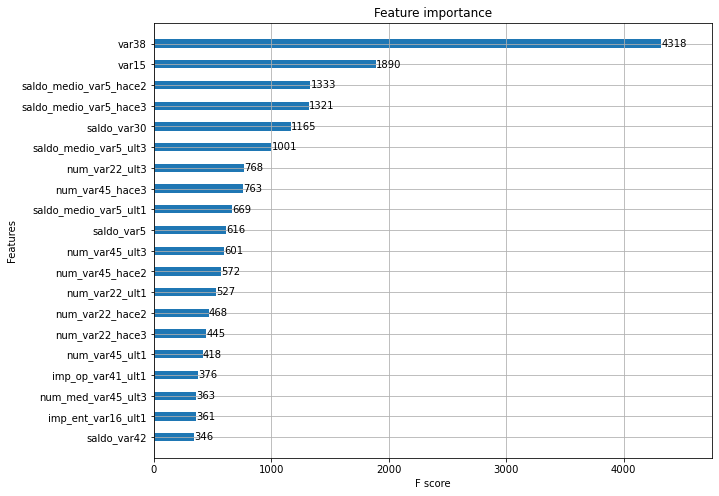

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

# subplots에서는 ax를 반환해준다.
fig, ax = plt.subplots(1,1,figsize=(10,8))
# xgb_clf는 pandas로 컬럼명이 들어있어서 컬럼명이 나온다.
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)
# F score : 얼마나 자주 사용되는 가를 계수로 나타낸 것이다.

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [26]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc',
             eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0: .4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [28]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators = 200)

params = {'num_leaves' : [32, 64],
         'max_depth' : [128, 160], 
         'min_child_samples' : [60, 100], 
         'subsamples' : [0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않는다.
gridcv = GridSearchCV(lgbm_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc',
          eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 : ', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0: .4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.151107
[6]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.139503	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.149167
[7]	valid_0's auc: 0.84864	valid_0's binary_logloss: 0.137792	valid_1's auc: 0.836612	valid_1's binary_logloss: 0.147629
[8]	valid_0's auc: 0.850006	valid_0's 

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's bina

[26]	valid_0's auc: 0.873522	valid_0's binary_logloss: 0.12487	valid_1's auc: 0.83729	valid_1's binary_logloss: 0.139751
[27]	valid_0's auc: 0.874428	valid_0's binary_logloss: 0.124521	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.139667
[28]	valid_0's auc: 0.875453	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.836916	valid_1's binary_logloss: 0.139693
[29]	valid_0's auc: 0.876968	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.836543	valid_1's binary_logloss: 0.139692
[30]	valid_0's auc: 0.878211	valid_0's binary_logloss: 0.123513	valid_1's auc: 0.836768	valid_1's binary_logloss: 0.139653
[31]	valid_0's auc: 0.879123	valid_0's binary_logloss: 0.123238	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.139687
[32]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.122982	valid_1's auc: 0.836481	valid_1's binary_logloss: 0.139632
[33]	valid_0's auc: 0.880297	valid_0's binary_logloss: 0.122728	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.139575
[34]	valid_0's auc: 

[24]	valid_0's auc: 0.870532	valid_0's binary_logloss: 0.125527	valid_1's auc: 0.838429	valid_1's binary_logloss: 0.139818
[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc: 0.877253	valid_0's binary_logloss: 0.123222	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.139525
[32]	valid_0's au

[22]	valid_0's auc: 0.870971	valid_0's binary_logloss: 0.126075	valid_1's auc: 0.840789	valid_1's binary_logloss: 0.140251
[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.873433	valid_0's binary_logloss: 0.125215	valid_1's auc: 0.840763	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc

[35]	valid_0's auc: 0.901929	valid_0's binary_logloss: 0.114682	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.139758
[36]	valid_0's auc: 0.902923	valid_0's binary_logloss: 0.114287	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.139739
[37]	valid_0's auc: 0.903583	valid_0's binary_logloss: 0.113893	valid_1's auc: 0.836319	valid_1's binary_logloss: 0.139831
[38]	valid_0's auc: 0.904289	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139874
[39]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.113207	valid_1's auc: 0.835797	valid_1's binary_logloss: 0.139959
[40]	valid_0's auc: 0.905808	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.835879	valid_1's binary_logloss: 0.139967
[41]	valid_0's auc: 0.906507	valid_0's binary_logloss: 0.112548	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.139996
[42]	valid_0's auc: 0.907263	valid_0's binary_logloss: 0.112199	valid_1's auc: 0.835583	valid_1's binary_logloss: 0.140069
[43]	valid_0's a

[18]	valid_0's auc: 0.882607	valid_0's binary_logloss: 0.122935	valid_1's auc: 0.836156	valid_1's binary_logloss: 0.140354
[19]	valid_0's auc: 0.884204	valid_0's binary_logloss: 0.122205	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.140094
[20]	valid_0's auc: 0.88564	valid_0's binary_logloss: 0.121562	valid_1's auc: 0.836976	valid_1's binary_logloss: 0.139982
[21]	valid_0's auc: 0.886788	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.139793
[22]	valid_0's auc: 0.888424	valid_0's binary_logloss: 0.120314	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.139623
[23]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.119797	valid_1's auc: 0.837015	valid_1's binary_logloss: 0.139653
[24]	valid_0's auc: 0.891304	valid_0's binary_logloss: 0.119202	valid_1's auc: 0.837202	valid_1's binary_logloss: 0.139584
[25]	valid_0's auc: 0.892545	valid_0's binary_logloss: 0.118664	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.1395
[26]	valid_0's auc: 0

[47]	valid_0's auc: 0.910771	valid_0's binary_logloss: 0.110662	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.140222
Early stopping, best iteration is:
[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_logloss: 0.140902
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_logloss: 0.13934	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.150958
[6

[18]	valid_0's auc: 0.882597	valid_0's binary_logloss: 0.123216	valid_1's auc: 0.836645	valid_1's binary_logloss: 0.140956
[19]	valid_0's auc: 0.884069	valid_0's binary_logloss: 0.1225	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140747
[20]	valid_0's auc: 0.885553	valid_0's binary_logloss: 0.121835	valid_1's auc: 0.837335	valid_1's binary_logloss: 0.140578
[21]	valid_0's auc: 0.886758	valid_0's binary_logloss: 0.121199	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.1405
[22]	valid_0's auc: 0.888245	valid_0's binary_logloss: 0.120566	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.140423
[23]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.119999	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140319
[24]	valid_0's auc: 0.890242	valid_0's binary_logloss: 0.119535	valid_1's auc: 0.837226	valid_1's binary_logloss: 0.140192
[25]	valid_0's auc: 0.89128	valid_0's binary_logloss: 0.119025	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.140152
[26]	valid_0's auc: 0

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0'

[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc: 0.901751	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.139951
[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.906683	valid_0's binary_logloss: 0.112912	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139857
[41]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.112589	valid_1's auc: 0.836763	valid_1's binary_logloss: 0.139978
[42]	valid_0's auc: 0.

[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.139712
[30]	valid_0's auc: 0.876317	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.139716
[31]	valid_0's auc: 0.87724	valid_0's binary_logloss: 0.123841	valid_1's auc: 0.836284	valid_1's binary_logloss: 0.139683
[32]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.123594	valid_1's auc: 0.835851	valid_1's binary_logloss: 0.139729
[33]	valid_0's auc

[22]	valid_0's auc: 0.868709	valid_0's binary_logloss: 0.126813	valid_1's auc: 0.839171	valid_1's binary_logloss: 0.14001
[23]	valid_0's auc: 0.869543	valid_0's binary_logloss: 0.126412	valid_1's auc: 0.839032	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.870296	valid_0's binary_logloss: 0.126025	valid_1's auc: 0.839048	valid_1's binary_logloss: 0.139785
[25]	valid_0's auc: 0.871119	valid_0's binary_logloss: 0.125654	valid_1's auc: 0.83856	valid_1's binary_logloss: 0.139743
[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0.874662	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139579
[30]	valid_0's auc: 

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's b

[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.

[24]	valid_0's auc: 0.869271	valid_0's binary_logloss: 0.126307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.140281
[25]	valid_0's auc: 0.870212	valid_0's binary_logloss: 0.125949	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.14025
[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.875088	valid_0's binary_logloss: 0.12452	valid_1's auc: 0.837397	valid_1's binary_logloss: 0.140013
[30]	valid_0's auc: 0.876006	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.837051	valid_1's binary_logloss: 0.140044
[31]	valid_0's auc: 0.876443	valid_0's binary_logloss: 0.123946	valid_1's auc: 0.837341	valid_1's binary_logloss: 0.139984
[32]	valid_0's auc:

[48]	valid_0's auc: 0.887253	valid_0's binary_logloss: 0.119903	valid_1's auc: 0.838451	valid_1's binary_logloss: 0.139321
[49]	valid_0's auc: 0.887742	valid_0's binary_logloss: 0.11971	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139332
[50]	valid_0's auc: 0.888224	valid_0's binary_logloss: 0.119543	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139353
[51]	valid_0's auc: 0.888667	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.838246	valid_1's binary_logloss: 0.1394
Early stopping, best iteration is:
[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.14013
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035

[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874282	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.842697	valid_1's binary_logloss: 0.138796
[29]	valid_0's auc: 0.875185	valid_0's binary_logloss: 0.124481	valid_1's auc: 0.843506	valid_1's binary_logloss: 0.138625
[30]	valid_0's auc: 0.875805	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.138532
[31]	valid_0's auc: 0.877289	valid_0's binary_logloss: 0.123898	valid_1's auc: 0.84385	valid_1's binary_logloss: 0.138455
[32]	valid_0's auc: 0.878137	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.843943	valid_1's binary_logloss: 0.138401
[33]	valid_0's auc: 0.879141	valid_0's binary_logloss: 0.123349	valid_1's auc: 0.843945	valid_1's binary_logloss: 0.13837
[34]	valid_0's auc: 0.879829	valid_0's binary_logloss: 0.123074	valid_1's auc: 0.844035	valid_1's binary_logloss: 0.13828
[35]	valid_0's auc:

[18]	valid_0's auc: 0.880333	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.14109
[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.889261	valid_0's binary_logloss: 0.120276	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140524
[26]	valid_0's auc: 0

[17]	valid_0's auc: 0.87775	valid_0's binary_logloss: 0.125008	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.140988
[18]	valid_0's auc: 0.879171	valid_0's binary_logloss: 0.124326	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140636
[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.121228	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.140035
[24]	valid_0's auc: 0.887902	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.83666	valid_1's binary_logloss: 0.139977
[25]	valid_0's auc:

[50]	valid_0's auc: 0.906329	valid_0's binary_logloss: 0.112158	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140395
[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logloss: 0.137951	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.149162
[7]	valid_0's auc: 0.862439	valid_0's binary_logloss: 0.136077	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.147649
[8]	valid_0's auc: 0.864272	valid_0

[28]	valid_0's auc: 0.892973	valid_0's binary_logloss: 0.118875	valid_1's auc: 0.83339	valid_1's binary_logloss: 0.140614
[29]	valid_0's auc: 0.894538	valid_0's binary_logloss: 0.118402	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140617
[30]	valid_0's auc: 0.895805	valid_0's binary_logloss: 0.117902	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140733
[31]	valid_0's auc: 0.897165	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.14067
[32]	valid_0's auc: 0.898106	valid_0's binary_logloss: 0.117027	valid_1's auc: 0.832548	valid_1's binary_logloss: 0.140717
[33]	valid_0's auc: 0.898897	valid_0's binary_logloss: 0.116646	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.140755
[34]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.11632	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.14074
[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0

[18]	valid_0's auc: 0.877745	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.838826	valid_1's binary_logloss: 0.140774
[19]	valid_0's auc: 0.87955	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.838685	valid_1's binary_logloss: 0.14062
[20]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839472	valid_1's binary_logloss: 0.140278
[21]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.123172	valid_1's auc: 0.839953	valid_1's binary_logloss: 0.139987
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840085	valid_1's binary_logloss: 0.139652
[24]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.121544	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.13967
[25]	valid_0's auc: 0.887231	valid_0's binary_logloss: 0.12107	valid_1's auc: 0.839583	valid_1's binary_logloss: 0.139554
[26]	valid_0's auc: 0.

[32]	valid_0's auc: 0.897473	valid_0's binary_logloss: 0.116901	valid_1's auc: 0.838447	valid_1's binary_logloss: 0.139683
[33]	valid_0's auc: 0.898375	valid_0's binary_logloss: 0.116464	valid_1's auc: 0.838512	valid_1's binary_logloss: 0.139636
[34]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.116054	valid_1's auc: 0.838475	valid_1's binary_logloss: 0.139614
[35]	valid_0's auc: 0.900316	valid_0's binary_logloss: 0.115653	valid_1's auc: 0.838522	valid_1's binary_logloss: 0.13957
[36]	valid_0's auc: 0.901114	valid_0's binary_logloss: 0.11531	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.139537
[37]	valid_0's auc: 0.901919	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139581
[38]	valid_0's auc: 0.902827	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.839027	valid_1's binary_logloss: 0.139517
[39]	valid_0's auc: 0.903647	valid_0's binary_logloss: 0.114176	valid_1's auc: 0.839264	valid_1's binary_logloss: 0.13948
[40]	valid_0's auc:

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0'

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.139689	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.14912
[7]	valid_0's auc: 0.848157	valid_0's binary_logloss: 0.137973	valid_1's auc: 0.836379	valid_1's binary_logloss: 0.147706
[8]	valid_0's auc: 0.84954	valid_0's 

[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.873433	valid_0's binary_logloss: 0.125215	valid_1's auc: 0.840763	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[31]	valid_0's auc

[41]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.12081	valid_1's auc: 0.835963	valid_1's binary_logloss: 0.139644
[42]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.139624
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856101	valid_0's binary_logloss: 0.13225	valid_1's auc: 0.840855	valid_1's binary_logloss: 0.142715
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.15368

[24]	valid_0's auc: 0.870532	valid_0's binary_logloss: 0.125527	valid_1's auc: 0.838429	valid_1's binary_logloss: 0.139818
[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc: 0.877253	valid_0's binary_logloss: 0.123222	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.139525
[32]	valid_0's au

[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.873433	valid_0's binary_logloss: 0.125215	valid_1's auc: 0.840763	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[31]	valid_0's auc

[34]	valid_0's auc: 0.900819	valid_0's binary_logloss: 0.115047	valid_1's auc: 0.836189	valid_1's binary_logloss: 0.139786
[35]	valid_0's auc: 0.901929	valid_0's binary_logloss: 0.114682	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.139758
[36]	valid_0's auc: 0.902923	valid_0's binary_logloss: 0.114287	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.139739
[37]	valid_0's auc: 0.903583	valid_0's binary_logloss: 0.113893	valid_1's auc: 0.836319	valid_1's binary_logloss: 0.139831
[38]	valid_0's auc: 0.904289	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139874
[39]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.113207	valid_1's auc: 0.835797	valid_1's binary_logloss: 0.139959
[40]	valid_0's auc: 0.905808	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.835879	valid_1's binary_logloss: 0.139967
[41]	valid_0's auc: 0.906507	valid_0's binary_logloss: 0.112548	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.139996
[42]	valid_0's a

[17]	valid_0's auc: 0.881659	valid_0's binary_logloss: 0.123628	valid_1's auc: 0.835985	valid_1's binary_logloss: 0.140605
[18]	valid_0's auc: 0.882607	valid_0's binary_logloss: 0.122935	valid_1's auc: 0.836156	valid_1's binary_logloss: 0.140354
[19]	valid_0's auc: 0.884204	valid_0's binary_logloss: 0.122205	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.140094
[20]	valid_0's auc: 0.88564	valid_0's binary_logloss: 0.121562	valid_1's auc: 0.836976	valid_1's binary_logloss: 0.139982
[21]	valid_0's auc: 0.886788	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.139793
[22]	valid_0's auc: 0.888424	valid_0's binary_logloss: 0.120314	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.139623
[23]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.119797	valid_1's auc: 0.837015	valid_1's binary_logloss: 0.139653
[24]	valid_0's auc: 0.891304	valid_0's binary_logloss: 0.119202	valid_1's auc: 0.837202	valid_1's binary_logloss: 0.139584
[25]	valid_0's auc:

[47]	valid_0's auc: 0.910771	valid_0's binary_logloss: 0.110662	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.140222
Early stopping, best iteration is:
[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_logloss: 0.140902
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_logloss: 0.13934	valid_1's auc: 0.833555	valid_1's binary_logloss: 0.150958
[6

[17]	valid_0's auc: 0.881444	valid_0's binary_logloss: 0.123911	valid_1's auc: 0.836877	valid_1's binary_logloss: 0.141158
[18]	valid_0's auc: 0.882597	valid_0's binary_logloss: 0.123216	valid_1's auc: 0.836645	valid_1's binary_logloss: 0.140956
[19]	valid_0's auc: 0.884069	valid_0's binary_logloss: 0.1225	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140747
[20]	valid_0's auc: 0.885553	valid_0's binary_logloss: 0.121835	valid_1's auc: 0.837335	valid_1's binary_logloss: 0.140578
[21]	valid_0's auc: 0.886758	valid_0's binary_logloss: 0.121199	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.1405
[22]	valid_0's auc: 0.888245	valid_0's binary_logloss: 0.120566	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.140423
[23]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.119999	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140319
[24]	valid_0's auc: 0.890242	valid_0's binary_logloss: 0.119535	valid_1's auc: 0.837226	valid_1's binary_logloss: 0.140192
[25]	valid_0's auc: 

[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0'

[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc: 0.901751	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.139951
[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.906683	valid_0's binary_logloss: 0.112912	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139857
[41]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.112589	valid_1's auc: 0.836763	valid_1's binary_logloss: 0.139978
[42]	valid_0's auc: 0.

[24]	valid_0's auc: 0.871205	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.837453	valid_1's binary_logloss: 0.139824
[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.139712
[30]	valid_0's auc: 0.876317	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.139716
[31]	valid_0's auc: 0.87724	valid_0's binary_logloss: 0.123841	valid_1's auc: 0.836284	valid_1's binary_logloss: 0.139683
[32]	valid_0's auc:

[23]	valid_0's auc: 0.869543	valid_0's binary_logloss: 0.126412	valid_1's auc: 0.839032	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.870296	valid_0's binary_logloss: 0.126025	valid_1's auc: 0.839048	valid_1's binary_logloss: 0.139785
[25]	valid_0's auc: 0.871119	valid_0's binary_logloss: 0.125654	valid_1's auc: 0.83856	valid_1's binary_logloss: 0.139743
[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0.874662	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139579
[30]	valid_0's auc: 0.87542	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.838156	valid_1's binary_logloss: 0.139548
[31]	valid_0's auc: 

[42]	valid_0's auc: 0.882288	valid_0's binary_logloss: 0.121573	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139089
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856046	valid_0's binary_logloss: 0.132732	valid_1's auc: 0.840999	valid_1's binary_logloss: 0.142898
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[

[66]	valid_0's auc: 0.89727	valid_0's binary_logloss: 0.116455	valid_1's auc: 0.843435	valid_1's binary_logloss: 0.138362
[67]	valid_0's auc: 0.897643	valid_0's binary_logloss: 0.11627	valid_1's auc: 0.843148	valid_1's binary_logloss: 0.138424
[68]	valid_0's auc: 0.898008	valid_0's binary_logloss: 0.116079	valid_1's auc: 0.843355	valid_1's binary_logloss: 0.138452
[69]	valid_0's auc: 0.898293	valid_0's binary_logloss: 0.115943	valid_1's auc: 0.843203	valid_1's binary_logloss: 0.138515
[70]	valid_0's auc: 0.898585	valid_0's binary_logloss: 0.115794	valid_1's auc: 0.84311	valid_1's binary_logloss: 0.138551
[71]	valid_0's auc: 0.898878	valid_0's binary_logloss: 0.115634	valid_1's auc: 0.843163	valid_1's binary_logloss: 0.138557
[72]	valid_0's auc: 0.89933	valid_0's binary_logloss: 0.11544	valid_1's auc: 0.843123	valid_1's binary_logloss: 0.138587
[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0

[21]	valid_0's auc: 0.866373	valid_0's binary_logloss: 0.127496	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140637
[22]	valid_0's auc: 0.867435	valid_0's binary_logloss: 0.12708	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.1406
[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.12669	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140434
[24]	valid_0's auc: 0.869271	valid_0's binary_logloss: 0.126307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.140281
[25]	valid_0's auc: 0.870212	valid_0's binary_logloss: 0.125949	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.14025
[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.

[47]	valid_0's auc: 0.886486	valid_0's binary_logloss: 0.120099	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139274
[48]	valid_0's auc: 0.887253	valid_0's binary_logloss: 0.119903	valid_1's auc: 0.838451	valid_1's binary_logloss: 0.139321
[49]	valid_0's auc: 0.887742	valid_0's binary_logloss: 0.11971	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139332
[50]	valid_0's auc: 0.888224	valid_0's binary_logloss: 0.119543	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139353
[51]	valid_0's auc: 0.888667	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.838246	valid_1's binary_logloss: 0.1394
Early stopping, best iteration is:
[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.14013
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 round

[20]	valid_0's auc: 0.86733	valid_0's binary_logloss: 0.127618	valid_1's auc: 0.841078	valid_1's binary_logloss: 0.140192
[21]	valid_0's auc: 0.86847	valid_0's binary_logloss: 0.12718	valid_1's auc: 0.842056	valid_1's binary_logloss: 0.139899
[22]	valid_0's auc: 0.86912	valid_0's binary_logloss: 0.126786	valid_1's auc: 0.842604	valid_1's binary_logloss: 0.139581
[23]	valid_0's auc: 0.8702	valid_0's binary_logloss: 0.1264	valid_1's auc: 0.842923	valid_1's binary_logloss: 0.13938
[24]	valid_0's auc: 0.871154	valid_0's binary_logloss: 0.126012	valid_1's auc: 0.842853	valid_1's binary_logloss: 0.139199
[25]	valid_0's auc: 0.871861	valid_0's binary_logloss: 0.125716	valid_1's auc: 0.842924	valid_1's binary_logloss: 0.139114
[26]	valid_0's auc: 0.872932	valid_0's binary_logloss: 0.125379	valid_1's auc: 0.842821	valid_1's binary_logloss: 0.139002
[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874

[18]	valid_0's auc: 0.880333	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.14109
[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.889261	valid_0's binary_logloss: 0.120276	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140524
[26]	valid_0's auc: 0

[15]	valid_0's auc: 0.874777	valid_0's binary_logloss: 0.126525	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.141352
[16]	valid_0's auc: 0.876077	valid_0's binary_logloss: 0.125761	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.141109
[17]	valid_0's auc: 0.87775	valid_0's binary_logloss: 0.125008	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.140988
[18]	valid_0's auc: 0.879171	valid_0's binary_logloss: 0.124326	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140636
[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc

[49]	valid_0's auc: 0.90574	valid_0's binary_logloss: 0.112462	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140337
[50]	valid_0's auc: 0.906329	valid_0's binary_logloss: 0.112158	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140395
[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159

[61]	valid_0's auc: 0.915354	valid_0's binary_logloss: 0.107682	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140197
[62]	valid_0's auc: 0.915606	valid_0's binary_logloss: 0.107477	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.140336
[63]	valid_0's auc: 0.916315	valid_0's binary_logloss: 0.107178	valid_1's auc: 0.836449	valid_1's binary_logloss: 0.140384
[64]	valid_0's auc: 0.916522	valid_0's binary_logloss: 0.10698	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.140446
[65]	valid_0's auc: 0.917048	valid_0's binary_logloss: 0.106704	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.140528
[66]	valid_0's auc: 0.917714	valid_0's binary_logloss: 0.1065	valid_1's auc: 0.836017	valid_1's binary_logloss: 0.140589
[67]	valid_0's auc: 0.918245	valid_0's binary_logloss: 0.106235	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140673
[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0

[17]	valid_0's auc: 0.879493	valid_0's binary_logloss: 0.125166	valid_1's auc: 0.834462	valid_1's binary_logloss: 0.141684
[18]	valid_0's auc: 0.880697	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.141381
[19]	valid_0's auc: 0.881751	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.83548	valid_1's binary_logloss: 0.141089
[20]	valid_0's auc: 0.883208	valid_0's binary_logloss: 0.123231	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.141074
[21]	valid_0's auc: 0.884441	valid_0's binary_logloss: 0.122672	valid_1's auc: 0.835086	valid_1's binary_logloss: 0.140871
[22]	valid_0's auc: 0.885795	valid_0's binary_logloss: 0.122047	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.140833
[23]	valid_0's auc: 0.88703	valid_0's binary_logloss: 0.121437	valid_1's auc: 0.834867	valid_1's binary_logloss: 0.14067
[24]	valid_0's auc: 0.888628	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.140607
[25]	valid_0's auc:

[16]	valid_0's auc: 0.875071	valid_0's binary_logloss: 0.126463	valid_1's auc: 0.838328	valid_1's binary_logloss: 0.141336
[17]	valid_0's auc: 0.87671	valid_0's binary_logloss: 0.125734	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.140993
[18]	valid_0's auc: 0.877745	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.838826	valid_1's binary_logloss: 0.140774
[19]	valid_0's auc: 0.87955	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.838685	valid_1's binary_logloss: 0.14062
[20]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839472	valid_1's binary_logloss: 0.140278
[21]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.123172	valid_1's auc: 0.839953	valid_1's binary_logloss: 0.139987
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840085	valid_1's binary_logloss: 0.139652
[24]	valid_0's auc: 0

[31]	valid_0's auc: 0.896336	valid_0's binary_logloss: 0.117289	valid_1's auc: 0.838384	valid_1's binary_logloss: 0.139687
[32]	valid_0's auc: 0.897473	valid_0's binary_logloss: 0.116901	valid_1's auc: 0.838447	valid_1's binary_logloss: 0.139683
[33]	valid_0's auc: 0.898375	valid_0's binary_logloss: 0.116464	valid_1's auc: 0.838512	valid_1's binary_logloss: 0.139636
[34]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.116054	valid_1's auc: 0.838475	valid_1's binary_logloss: 0.139614
[35]	valid_0's auc: 0.900316	valid_0's binary_logloss: 0.115653	valid_1's auc: 0.838522	valid_1's binary_logloss: 0.13957
[36]	valid_0's auc: 0.901114	valid_0's binary_logloss: 0.11531	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.139537
[37]	valid_0's auc: 0.901919	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139581
[38]	valid_0's auc: 0.902827	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.839027	valid_1's binary_logloss: 0.139517
[39]	valid_0's auc

[39]	training's auc: 0.890714	training's binary_logloss: 0.11968	valid_1's auc: 0.840428	valid_1's binary_logloss: 0.139105
[40]	training's auc: 0.891404	training's binary_logloss: 0.119442	valid_1's auc: 0.840378	valid_1's binary_logloss: 0.139097
[41]	training's auc: 0.892277	training's binary_logloss: 0.11918	valid_1's auc: 0.840193	valid_1's binary_logloss: 0.139118
[42]	training's auc: 0.89285	training's binary_logloss: 0.118953	valid_1's auc: 0.8401	valid_1's binary_logloss: 0.139133
[43]	training's auc: 0.893788	training's binary_logloss: 0.118689	valid_1's auc: 0.839852	valid_1's binary_logloss: 0.139177
[44]	training's auc: 0.894586	training's binary_logloss: 0.11839	valid_1's auc: 0.8399	valid_1's binary_logloss: 0.139139
[45]	training's auc: 0.895251	training's binary_logloss: 0.118161	valid_1's auc: 0.840011	valid_1's binary_logloss: 0.139144
[46]	training's auc: 0.896025	training's binary_logloss: 0.117845	valid_1's auc: 0.839995	valid_1's binary_logloss: 0.139135
[47]	tra

In [30]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=60,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.816534	valid_0's binary_logloss: 0.165167
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81932	valid_0's binary_logloss: 0.160019
[3]	valid_0's auc: 0.827935	valid_0's binary_logloss: 0.156362
[4]	valid_0's auc: 0.833269	valid_0's binary_logloss: 0.153469
[5]	valid_0's auc: 0.83486	valid_0's binary_logloss: 0.151262
[6]	valid_0's auc: 0.836656	valid_0's binary_logloss: 0.149439
[7]	valid_0's auc: 0.838769	valid_0's binary_logloss: 0.147844
[8]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.146502
[9]	valid_0's auc: 0.839985	valid_0's binary_logloss: 0.145462
[10]	valid_0's auc: 0.8401	valid_0's binary_logloss: 0.144512
[11]	valid_0's auc: 0.840377	valid_0's binary_logloss: 0.14369
[12]	valid_0's auc: 0.840823	valid_0's binary_logloss: 0.143055
[13]	valid_0's auc: 0.840551	valid_0's binary_logloss: 0.142537
[14]	valid_0's auc: 0.8399	valid_0's binary_logloss: 0.142111
[15]	va

[130]	valid_0's auc: 0.837217	valid_0's binary_logloss: 0.140344
Early stopping, best iteration is:
[30]	valid_0's auc: 0.841785	valid_0's binary_logloss: 0.139112
ROC AUC: 0.8418
